In [3]:
from datetime import datetime, timedelta

# Starting date
start_date = datetime(2010, 1, 1)

In [4]:
start_date

datetime.datetime(2010, 1, 1, 0, 0)

In [5]:
import ephem

distance_moon_earth = []
distance_sun_earth = []
alt_moon = []
az_moon = []
alt_sun = []
az_sun = []
for i in range(87648):
  gatech = ephem.Observer()
  gatech.lon, gatech.lat = '13', '45'
  gatech.date = ephem.date(start_date + timedelta(hours=i))
  sun, moon = ephem.Sun(), ephem.Moon()
  sun.compute(gatech)
  moon.compute(gatech)
  #print("%s %s" % (sun.alt, sun.az))
  #print("%s %s" % (moon.alt, moon.az))
  alt_moon.append(moon.alt)
  az_moon.append(moon.az)
  alt_sun.append(sun.alt)
  az_sun.append(sun.az)
  #print("distance ",moon.earth_distance)
  distance_moon_earth.append(moon.earth_distance)
  distance_sun_earth.append(sun.earth_distance)


In [6]:
print(gatech.date)

2019/12/31 23:00:00


In [49]:
import numpy as np
tmp = np.zeros((6,87648))

In [50]:
tmp[0] = np.array(distance_moon_earth)
tmp[1] = np.array(alt_moon)
tmp[2] = np.array(az_moon)
tmp[3] = np.array(distance_sun_earth)
tmp[4] = np.array(alt_sun)
tmp[5] = np.array(az_sun)

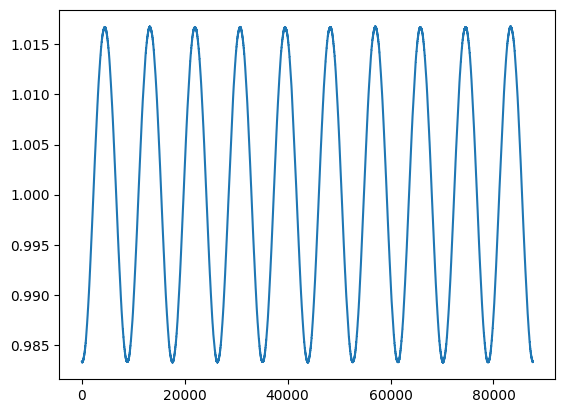

In [51]:
import matplotlib.pyplot as plt
plt.plot(tmp[3])

In [52]:
def min_max_normalize(arr, max, min):
    return (arr - min) / (max - min)

In [53]:
for i in range(6):
    tmp[i] = min_max_normalize(tmp[i], tmp[i].max(), tmp[i].min())

In [55]:
for i in range(6):
    print(tmp[i].max())

1.0
1.0
1.0
1.0
1.0
1.0


In [57]:
np.save("dist_alt_az_moon-sun_coord13-45_2010-2019_norm",tmp)

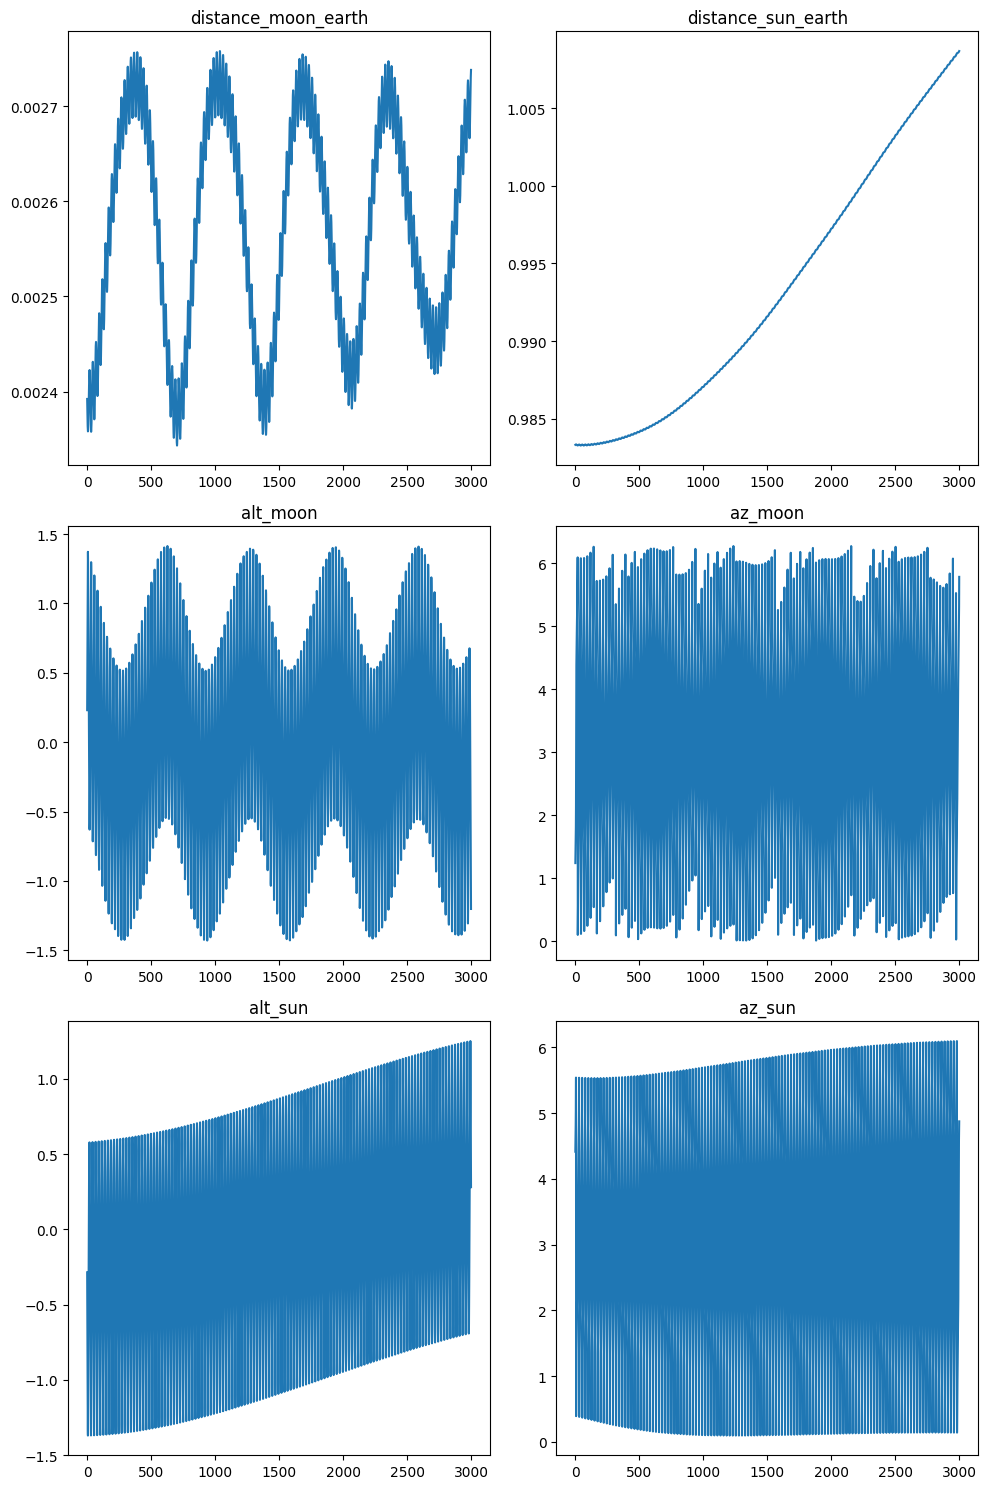

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a 3x2 subplot layout
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Plotting the data on each subplot
axs[0, 0].plot(distance_moon_earth)
axs[0, 0].set_title('distance_moon_earth')

axs[0, 1].plot(distance_sun_earth)
axs[0, 1].set_title('distance_sun_earth')

axs[1, 0].plot(alt_moon)
axs[1, 0].set_title('alt_moon')

axs[1, 1].plot(az_moon)
axs[1, 1].set_title('az_moon')

axs[2, 0].plot(alt_sun)
axs[2, 0].set_title('alt_sun')

axs[2, 1].plot(az_sun)
axs[2, 1].set_title('az_sun')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [120]:
# import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_components(data, name):
    # Example data: 1000 measurements, values randomly generated for illustration
    data = np.array(data) # Placeholder for your actual data
    
    # Sampling parameters
    fs = 1  # samples per hour (sampling rate)
    N = len(data)  # Number of samples
    
    # FFT
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(N, 1/fs)
    
    # Magnitude of the FFT (one-sided)
    magnitude = np.abs(fft_result)[:N // 2] * 2 / N
    freqs = frequencies[:N // 2]
    
    # Plotting
    plt.figure(figsize=(14, 6))
    plt.plot(freqs[1:], magnitude[1:])
    plt.title(name)
    plt.xlabel('Frequency (cycles per hour)')
    plt.ylabel('Magnitude')
    plt.xlim([0, 0.1])  # Limiting to Nyquist frequency
    plt.xticks(np.arange(0, 0.1, 0.005))
    plt.grid(True)
    plt.show()


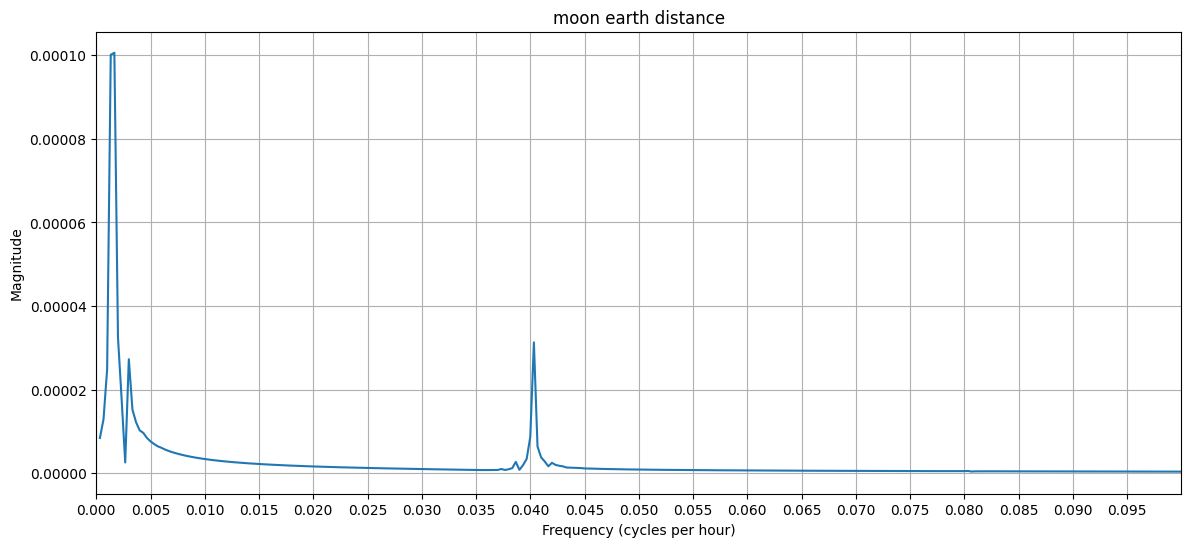

In [122]:
plot_frequency_components(distance_moon_earth, "moon earth distance")

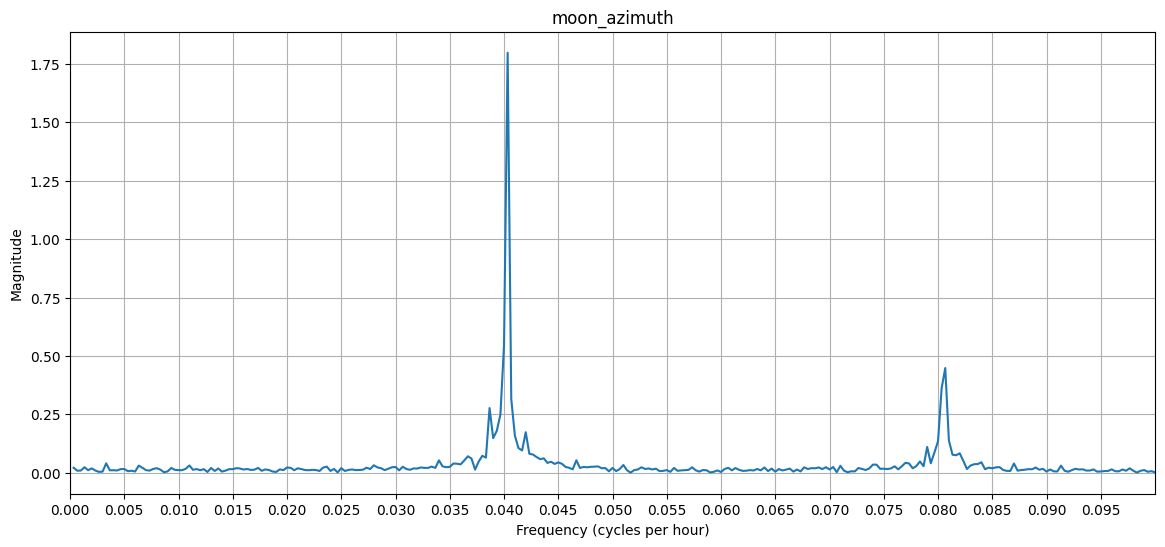

In [126]:
plot_frequency_components(az_moon, "moon_azimuth")

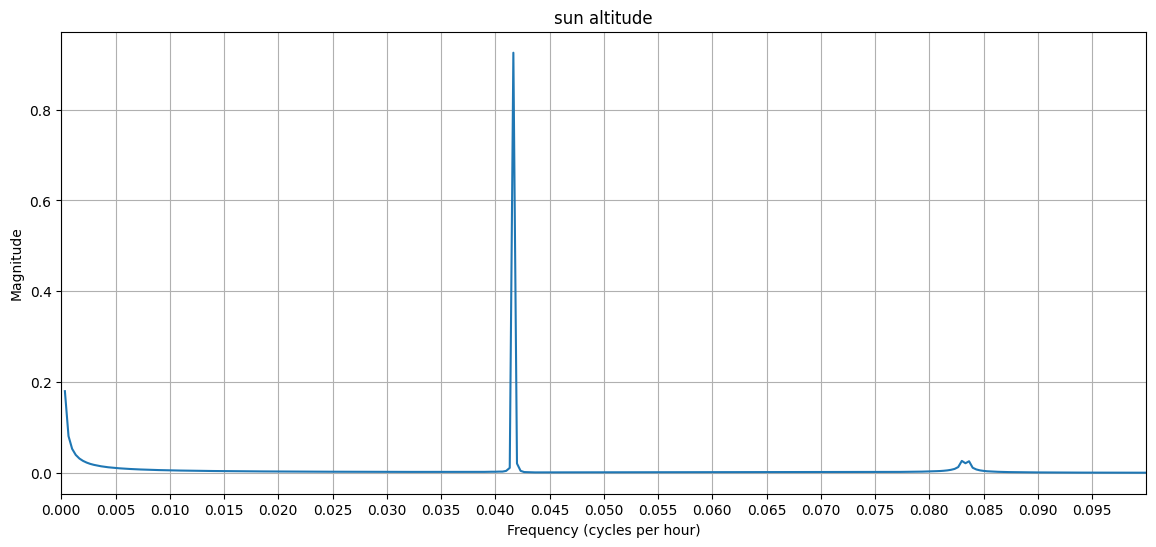

In [125]:
plot_frequency_components(alt_sun, "sun altitude")

In [128]:
test_set = np.load("/home/faster/Documents/approximating_shefem/processed_data/2019_images.npy")

In [129]:
test_set = test_set[:,50,200]

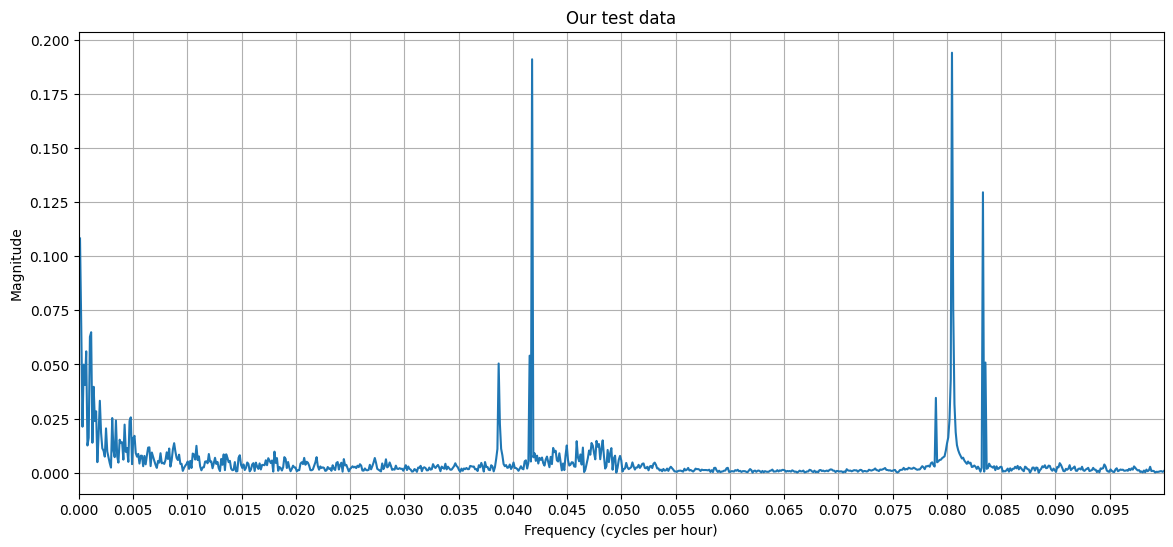

In [127]:
plot_frequency_components(test_set, "Our test data")

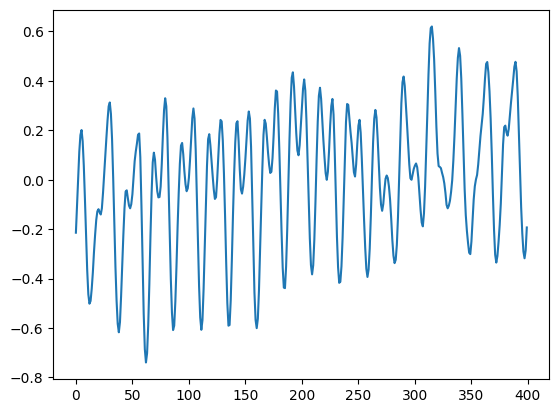

In [133]:
plt.plot(test_set[:400])

In [134]:
import keras 
import numpy as np 
import matplotlib.pyplot as plt

2024-03-25 13:48:15.281001: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 13:48:15.296960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 13:48:15.296980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 13:48:15.297453: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-25 13:48:15.300329: I tensorflow/core/platform/cpu_feature_guar

In [140]:
input = keras.Input((6,))
dense = keras.layers.Dense(128,activation = "relu")(input)
reshape = keras.layers.Reshape((8,16,1))(dense)
up = keras.layers.Conv2DTranspose(10,(3,3),strides=(2,2),padding="same",activation="relu")(reshape)
up = keras.layers.Conv2DTranspose(10,(3,3),strides=(2,2),padding="same",activation="relu")(up)
up = keras.layers.Conv2DTranspose(10,(3,3),strides=(2,2),padding="same",activation="relu")(up)
up = keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding="same",activation="relu")(up)

model = keras.Model(input,up)

In [141]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 6)                 │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 128)               │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape_3 (Reshape)             │ (None, 8, 16, 1)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_6              │ (None, 16, 32, 10)        │        100 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_7              │ (None, 32, 64, 10)        │        910 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_8              │ (None, 64, 128, 10)       │        910 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_9              │ (None, 128, 256, 1)       │         91 │
│ (Conv2DTranspose)               │                           │            │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,907 (11.36 KB)

 Trainable params: 2,907 (11.36 KB)

 Non-trainable params: 0 (0.00 B)